# Assignment2


In [7]:
#Import necessary libraries
import pandas as pd
import cv2
import pyabf
import matplotlib.pyplot as plt

In [2]:
# read files
csv_df = pd.read_csv("Nuclei.csv")
excel_df = pd.read_excel("Financial Sample.xlsx")
image = cv2.imread("Nuclei_Msk.jpg")
abf = pyabf.ABF("16o03002.abf")

### Process CSV file
This csv file seems contain some fun numbers about Nuclei. I don't quit understand about what it's every column about. So I output some basic statics number about this csv file.

In [4]:
def AnalyzeCSV(csv_df):
    return csv_df.describe()

AnalyzeCSV(csv_df)

,ImageNumber,ObjectNumber,Intensity_IntegratedIntensityEdge_DAPI,Intensity_IntegratedIntensityEdge_PI,Intensity_IntegratedIntensity_DAPI,Intensity_IntegratedIntensity_PI,Intensity_LowerQuartileIntensity_DAPI,Intensity_LowerQuartileIntensity_PI,Intensity_MADIntensity_DAPI,Intensity_MADIntensity_PI,...,Intensity_MinIntensityEdge_PI,Intensity_MinIntensity_DAPI,Intensity_MinIntensity_PI,Intensity_StdIntensityEdge_DAPI,Intensity_StdIntensityEdge_PI,Intensity_StdIntensity_DAPI,Intensity_StdIntensity_PI,Intensity_UpperQuartileIntensity_DAPI,Intensity_UpperQuartileIntensity_PI,Number_Object_Number
count,1244.0,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,1.0,622.500000,5.010761,4.279991,59.911794,26.723821,0.055663,0.035176,0.031253,0.003959,...,0.029483,0.033260,0.029339,0.009720,0.005882,0.040456,0.007784,0.123382,0.045752,622.500000
std,0.0,359.256176,1.473586,3.495266,31.131561,38.306838,0.005882,0.025805,0.012597,0.019958,...,0.010084,0.003020,0.010093,0.012599,0.022196,0.022732,0.033475,0.033349,0.072223,359.256176
min,1.0,1.000000,1.969421,1.188937,4.785382,2.322469,0.037179,0.028054,0.006256,0.000595,...,0.023468,0.024338,0.023468,0.002689,0.000946,0.009035,0.000976,0.053887,0.029587,1.000000
25%,1.0,311.750000,4.253437,3.339506,41.722286,17.132189,0.051933,0.031629,0.022107,0.001061,...,0.027756,0.031140,0.027634,0.004655,0.001633,0.027635,0.001576,0.101867,0.033959,311.750000
50%,1.0,622.500000,4.706317,3.717296,47.698375,20.005997,0.055173,0.032532,0.028622,0.001225,...,0.028809,0.033326,0.028702,0.005415,0.001920,0.034145,0.001815,0.115518,0.035025,622.500000
75%,1.0,933.250000,5.282853,4.163428,77.833661,25.382410,0.058977,0.033509,0.037791,0.001459,...,0.029835,0.035233,0.029664,0.006995,0.002387,0.044745,0.002195,0.136931,0.036316,933.250000
max,1.0,1244.000000,19.793484,62.221607,302.683742,705.432120,0.078969,0.483635,0.083909,0.330999,...,0.257984,0.042176,0.257984,0.154181,0.282303,0.187355,0.352611,0.319646,0.999954,1244.000000


### Process Excel File
BarPlot is defined to accept a string which is the name of a column, and it will plot a vertical bar about the mean of the input column grouped by contries. It support any numberic columns in this excel file. It is easy to extend to other column combinations.

In [65]:
def BarPlot(column):
    excel_df.groupby(['Country'])[column].mean().plot.bar()

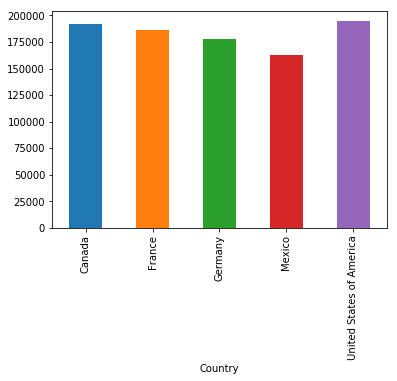

In [63]:
BarPlot('Gross Sales')

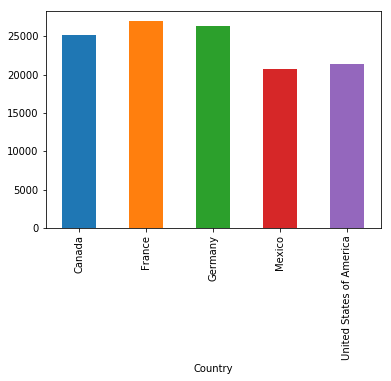

In [64]:
BarPlot('Profit')

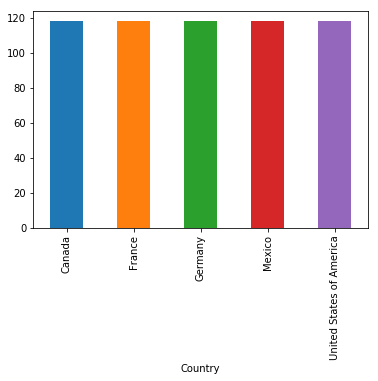

In [67]:
BarPlot('Sale Price')

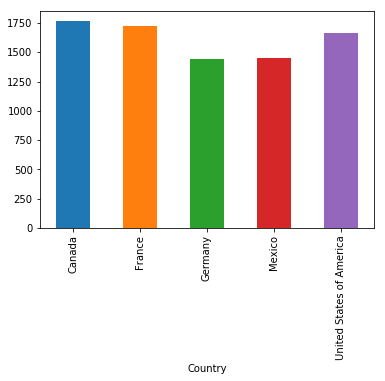

In [69]:
BarPlot('Units Sold')

### Process Image
This method accepts an image and convert it to Grayscale. It will show you an preview after converting.

In [3]:
def GrayScaleImage(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
gray_image = GrayScaleImage(image);
cv2.imwrite('gray_image.png',gray_image)
cv2.imshow('gray_image',gray_image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

This method resizes a image too 800 * 800

In [22]:
def ResizeImage(pic):
    return cv2.resize(pic, (800, 800))

In [23]:
resized_image = ResizeImage(image)
cv2.imwrite('resized_image.png',resized_image)
cv2.imshow('resized_image',resized_image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### Process ABF file
This method accepts an abf file and plot it. I'm not quit farmiliar with this file format. It seems like it's a kind of Electrophysiological data. I found a open-source api to read and plot the abf file. It's called pyABF and it's used here to read and plot the graph.

In [10]:
def PlotSweepData(abf):
    abf.setSweep(0)
    plt.figure(figsize=(8, 5))
    plt.plot(abf.sweepX, abf.sweepY, lw=.5)
    plt.show()

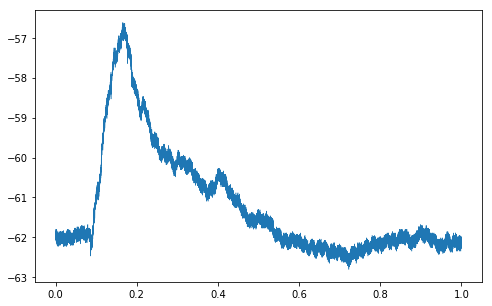

In [11]:
PlotSweepData(abf)